# Indian Pines dataset
---
Presented here is a brief run-through of some of the features of the scikit-hyper package using the Indian Pines (Site3) dataset. 

## Processing data

The Indian Pines dataset can be obtained from [here](https://purr.purdue.edu/publications/1947/1). scikit-image is used to read the .tif file as a numpy array. Note that the data has been transposed so that the format of the hyperspectral data is:

$[x, y, (z), spectrum]$

The data is then passed to the `Process` class and is scaled and normalized.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from skhyper.process import Process
from skhyper.decomposition import PCA, FastICA
from skhyper.cluster import KMeans
import skhyper.plot as cplt

im = np.transpose(io.imread('IndianPine_Site3.tif'))
im_labels = np.transpose(io.imread('IndianPine_Site3_gr.tif'))

X = Process(im, scale=True, normalize=True)

## Denoising dataset with PCA

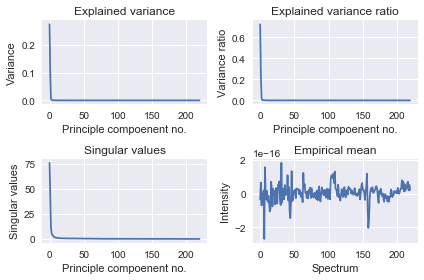

In [21]:
mdl_pca = PCA()
mdl_pca.fit_transform(X)
mdl_pca.plot_statistics()

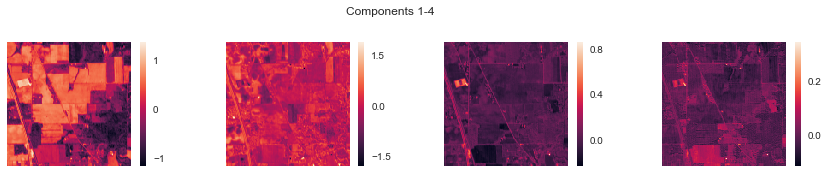

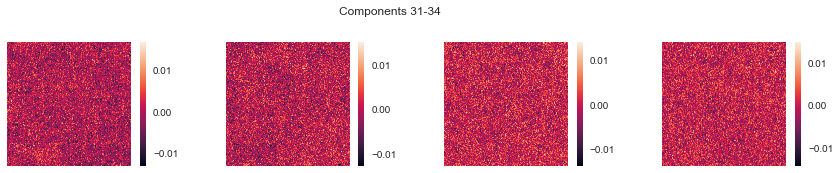

In [45]:
plt.figure(figsize=(15, 5))
cplt.components(images=mdl_pca.image_components_[:4])
plt.suptitle('Components 1-4')
plt.show()

plt.figure(figsize=(15, 5))
cplt.components(images=mdl_pca.image_components_[30:34])
plt.suptitle('Components 31-34')
plt.show()

In [27]:
Xd = mdl_pca.inverse_transform(n_components=30)

## Classifcation with SVM

In [54]:
from sklearn.svm import SVC as skl_svc
from skhyper.svm import SVC as skh_svc
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xd.flatten(), np.reshape(im_labels[0], (145*145, 1)))

In [66]:
mdl_svc = skl_svc()
mdl_svc.fit(x_train, np.squeeze(y_train))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
prediction = mdl_svc.predict(Xd.flatten())

In [68]:
mdl_svc.score(x_test, y_test)

0.626973559064105

In [78]:
np.unique(im_labels[0])

array([  768,  1280,  3072, 15360, 22784, 25856, 26624, 30464, 35584,
       40960, 44032, 65024, 65280], dtype=uint16)

In [79]:
from skhyper.svm import SVC

mdl_svc = SVC(probability=True)
trained_model_score = mdl_svc.fit_train_test(X, im_labels[0], test_size=0.7)

AttributeError: 'SVC' object has no attribute 'fit_train_test'

In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [86]:
le.fit(im_labels[0].flatten())

LabelEncoder()

In [90]:
im_labels_new = np.reshape(le.transform(im_labels[0].flatten()), (145, 145))

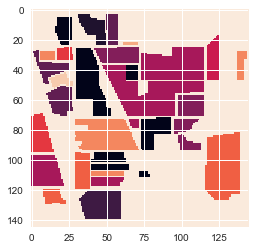

In [91]:
plt.figure()
plt.imshow(im_labels_new)
plt.show()